# Estimating Beta for META

## Introduction
Estimating the beta of a stock is a fundamental step in understanding its systematic risk relative to the market. Beta measures the sensitivity of a stock's returns to movements in the overall market, providing insight into how the stock is likely to respond to market-wide risk factors. For investors, beta is a key component in portfolio construction, risk management, and expected return estimation under the classical Capital Asset Pricing Model (CAPM).

In this part of the project, we focus on META (Facebook) stock. Using daily price data over a 10-year horizon, we apply linear regression to estimate beta and analyze the relationship between META's excess returns and the market risk premium. The analysis also includes residual diagnostics and visualization to evaluate the robustness of the OLS regression and the validity of CAPM assumptions.

## Goal 
The objective of this part is to estimate beta for META (Facebook) stock.

## Project structure
The project follows a simple and transparent structure. First, raw price data for META, the S&P 500 Total Return Index, and the risk-free proxy are collected from the specified data sources. Second, prices are transformed into daily arithmetic returns and aligned by date. Third, excess returns are computed by subtracting the risk-free rate from both stock and market returns. Finally, an OLS regression is estimated to obtain beta and related statistics, followed by basic diagnostic analysis and visualization.

## Model description
Beta is a parameter of a CAPM model that measures a sensitivity of stock returns to changes in market risk premiums. The CAPM model has a form

\begin{equation}

R_{stock} = R_f + \beta(R_{market} - R_f) + \epsilon,

\end{equation}

where $R_{stock}$, $R_f$, $R_{market}$ are stock returns, risk-free rate, market portfolio returns respectively, and $\epsilon \sim N(0,\sigma^2)$. We can use linear regression to estimate the parameters.

### Model Assumptions
On top of the standard assumption of the Linear Regression model we should add the assumptions specific for the CAPM. The assumptions of both frameworks are strong and in many cases unrealistic. The list of all of them is given below.

#### OLS Regression Assumptions
1. The relationship between the dependent and independent variables is linear;
2. Full Rank, i.e. there is no multicollinearity between the independent variables; 
3. Exogeneity of the independent variables: $E[\epsilon_i | x_{j1}, x_{xj2},...,x{jk}]=0$;
4. Homoscedasticity and nonautocorrelation of the residuals;
5. Residuals are normally distributed; 

#### CAPM Assumptions
1. Investors are risk-averse;
2. Every investor maximizes a utility of his terminal wealth;
3. Investors make their investment decisions on the risk-return basis;
4. All investors have the same expectations about risk and return;
5. All investor use identical time horizon for their investments, in other words, everyone sells its assets at the same time.
6. Everyone has a free access to the available information;
7. There is a risk-free asset and there is no restriction on borrowing and lending; 
8. There are no taxes or lending cost; 
9. All assets are marketable and divisible;

## Validation
Model validation is conducted using both statistical diagnostics and graphical analysis. Statistical significance of the estimated beta is assessed via standard errors and p-values. Goodness of fit is evaluated using the R-squared metric. Residual diagnostics include tests for normality (Omnibus and Jarque–Bera) and autocorrelation (Durbin–Watson). Additionally, scatter plots of excess stock returns against excess market returns with a fitted regression line are used to visually inspect linearity and potential outliers. Together, these checks help assess whether the OLS and CAPM assumptions are reasonably satisfied and whether the results should be interpreted analytically rather than predictively.

## Input data specification
* **Location:** The US Market 
* **Time Horizon:** 10 years (2012-12-21, 2022-12-20) 
* **Frequency:** Daily 
* **Returns:** Arithmetic 

### Proxies
* **Equity Index** represented by S&P 500 Total Return Index;
* **Bond Index** represented by the total returns on S&P U.S. Treasury Bond Index;

## Data Sources
* **Stock and equity index prices:** https://finance.yahoo.com/
* **Bond index prices:** https://www.spglobal.com/spdji/en/indices/fixed-income/sp-us-treasury-bond-index/#overview

## Results

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

In [2]:
# constants
DATA_PATH = '../data/linear_regression_data.csv'
STOCK_TICKER = 'META'
EQUITY_INDEX_TICKER = 'Equity Index'
BOND_INDEX_TICKER = 'Bond Index'

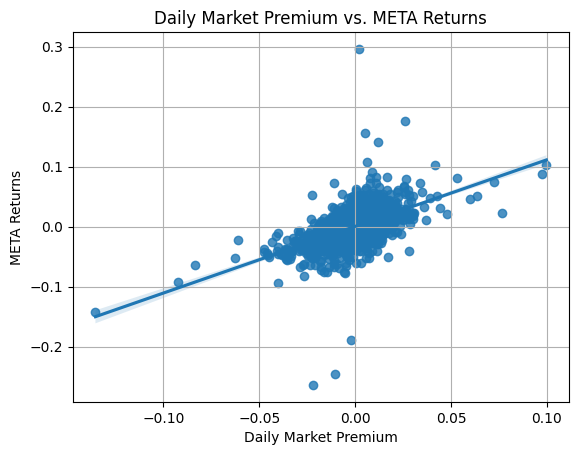

Correlation Matrix:
                    Bond Index  Equity Index      META  DailyMarketPremium
Bond Index            1.000000     -0.255346 -0.091253           -0.434204
Equity Index         -0.255346      1.000000  0.570911            0.981825
META                 -0.091253      0.570911  1.000000            0.549831
DailyMarketPremium   -0.434204      0.981825  0.549831            1.000000


In [3]:
# loading returns data
returns = pd.read_csv(DATA_PATH, index_col=0)

# additional calculations
returns['DailyMarketPremium'] = returns[EQUITY_INDEX_TICKER] - returns[BOND_INDEX_TICKER]

# plotting scatter plot with a regression line
sns.regplot(x='DailyMarketPremium', y=STOCK_TICKER, data=returns) 
plt.grid()
plt.xlabel('Daily Market Premium')
plt.ylabel(f'{STOCK_TICKER} Returns')
plt.title(f'Daily Market Premium vs. {STOCK_TICKER} Returns')
plt.show()

# estimating correlation matrix
print('Correlation Matrix:')
print(returns.corr())

In [4]:
# building OLS regression model
x = sm.add_constant(returns['DailyMarketPremium'])
y = (returns[STOCK_TICKER] - returns[BOND_INDEX_TICKER]).to_numpy()
model = sm.OLS(y, x)
fitted_model = model.fit()

# displaying results
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1293.
Date:                Fri, 16 Jan 2026   Prob (F-statistic):          1.38e-228
Time:                        18:23:12   Log-Likelihood:                 6253.2
No. Observations:                2499   AIC:                        -1.250e+04
Df Residuals:                    2497   BIC:                        -1.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003      0

## Conclusion 

A good starting point in OLS analysis is to examine the correlation matrix. The matrix may provide hints not only about which variables to include in the model, but also about potential multicollinearity. In our case, we are fitting a simple linear regression, so multicollinearity is not a concern. However, the matrix shows that the bond market is negatively correlated with the equity market. This suggests that including both instruments in a portfolio is beneficial, as it reduces portfolio volatility (risk). Another observation is that the market risk premium is negatively correlated with the bond market—more strongly than the bond market is correlated with the equity market. Thus, when interest rates rise, we should observe a decline in bond prices and, on average, a slight increase in equity prices. This contradicts the popular assumption that rising interest rates necessarily lead to falling equity prices. Further investigation is warranted, as the past decade was characterized by a prolonged period of low interest rates and fears of deflation and economic stagnation, during which markets tended to welcome even small increases in rates.

The scatter plot with the regression line is useful for assessing whether two variables are linearly related. In our case, the relationship is weak but statistically significant. However, this does not imply that the regression has strong predictive power. Rather, it indicates that the model’s forecasts cannot be relied upon. In such circumstances, the model is better suited for risk attribution and comparative analysis than for return forecasting.

Let us now examine the summary of our OLS regression model. Note that we subtract the risk-free rate from the META stock returns (dependent variable) thus working with excess returns. This approach yields an additional metric known as Jensen’s alpha, which is approximately zero, indicating that, on average, the stock does not outperform the benchmark. The beta coefficient is statistically significant, with a p-value close to zero and a low standard error. On the right-hand side, we observe an R-squared value of 0.341, meaning that the model explains 34.1% of the variation in the dependent variable (META returns). The adjusted R-squared, F-statistic, log-likelihood, AIC, and BIC are not particularly informative in the context of a simple regression.

Under the diagnostics section, we see several statistical tests related to the residuals. The Omnibus test assesses whether the residuals are normally distributed; the p-value of zero clearly indicates that they are not, violating one of the classical model assumptions. This further confirms the model’s limited predictive usefulness. The Durbin–Watson statistic tests for autocorrelation in the residuals. Since its value lies between 1 and 2, we conclude that the residuals are not autocorrelated. The Jarque–Bera (JB) test is an alternative to the Omnibus test and also evaluates normality; as expected, it confirms the previous result. Although the residuals show no autocorrelation, their non-normal distribution may reflect regime changes in the data, implying potential non-stationarity. Finally, the condition number measures how sensitive the estimated coefficients are to small changes in the data: low values imply stable estimates, while very large values suggest numerical instability, often caused by multicollinearity. The latter is not a concern here, as the model includes only one independent variable.

Overall, while the classical CAPM model is not well suited for long-term forecasting, it can still provide useful analytical insights. However, given the non-linear nature of stock returns, alternative approaches should be considered when estimating the required rate of return. The model can also be recalibrated frequently to partially address potential non-stationarity, or lower-frequency data can be used as an additional mitigation strategy.